In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

In [57]:
import os

cwd = os.getcwd()
os.chdir("C:\\Users\\MPC\\Downloads")
cwd
dataset = pd.read_excel('Davidova28nT(12.19-05.20).xls')

# execute the describe() function and transpose the output so that it doesn't overflow the width of the screen
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Код ошибки,4041.0,254813.568919,685251.072218,0.0,0.0,0.0,0.0,2097152.0


In [58]:
dataset.drop([0,1], inplace=True)
dataset.rename(columns={'Время': 'Time', 'Tвн': 'T_home, C', 'Tнв':'T_Inside'}, inplace=True)
dataset = dataset.query("~(Q <= 0)")
dataset = dataset.fillna(method='ffill')
dataset.head()

,"T_home, C",Q,M1,M2,dM,T1,T2,dT,T_Inside,deltaM,P1,P2,dP,ЧН,Код ошибки
2,21.940816,0.064528,2.233756,1.875612,0.358144,59.732147,35.838188,23.893959,-1.982143,17.430612,7.658507,3.989966,3.668541,1,0.0
3,21.997973,0.050693,2.038099,1.956182,0.081917,59.315968,35.734474,23.581494,-1.986250,4.101714,7.666063,4.004507,3.661556,1,0.0
4,21.999592,0.052936,2.045773,1.905203,0.140570,59.377853,35.663296,23.714557,-2.010000,7.115710,7.691383,4.011880,3.679503,1,0.0
5,22.000000,0.045167,1.931992,1.954105,-0.022113,59.281757,35.612133,23.669624,-1.954643,-1.138057,7.740299,4.014082,3.726216,1,0.0
6,22.009262,0.048108,1.981013,1.944919,0.036094,59.337376,35.668209,23.669167,-1.852143,1.838748,7.747794,4.024565,3.723229,1,0.0


In [59]:
dataset.rename(columns={'T_home, C': 'T_home'}, inplace=True)

In [45]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
T_home,4041.0,22.618991,0.826850,14.971603,22.209865,22.750000,23.215325,2.414795e+01
Q,4041.0,0.071162,0.032468,0.000233,0.048242,0.072871,0.096365,1.645058e-01
M1,4041.0,3.070747,1.489750,0.185370,1.595712,3.050167,4.327229,6.917621e+00
M2,4041.0,2.768517,1.479925,0.000000,1.229818,2.842368,4.017489,6.110839e+00
dM,4041.0,0.302230,0.222049,-0.073169,0.132669,0.292993,0.446884,1.131124e+00
T1,4041.0,62.451602,5.494157,23.364759,58.764530,60.286221,66.467583,7.902904e+01
T2,4041.0,43.534279,7.599338,23.148203,37.152809,44.344597,48.210388,6.497237e+01
dT,4041.0,18.917323,7.551302,0.216556,17.243816,20.695339,24.160366,3.064397e+01
T_Inside,4041.0,0.481689,8.339425,-17.043750,-6.776786,0.403214,7.170000,2.467143e+01
deltaM,4041.0,14.231289,14.238006,-1.668737,4.107685,9.730832,21.552988,2.000000e+02


In [60]:
dataset.corr()[['Q']].sort_values('Q')

,Q
T_Inside,-0.834254
dP,-0.661147
Код ошибки,-0.625694
P1,-0.367741
deltaM,-0.322663
T2,0.134361
T_home,0.254302
dM,0.317688
dT,0.405573
T1,0.743272


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4041 entries, 2 to 4042
Data columns (total 13 columns):
T_home      4041 non-null float64
Q           4041 non-null float64
M1          4041 non-null float64
M2          4041 non-null float64
dM          4041 non-null float64
T1          4041 non-null float64
T2          4041 non-null float64
dT          4041 non-null float64
T_Inside    4041 non-null float64
deltaM      4041 non-null float64
P1          4041 non-null float64
P2          4041 non-null float64
dP          4041 non-null float64
dtypes: float64(13)
memory usage: 442.0 KB


In [61]:
David = dataset.copy()

In [62]:
# First drop the maxtempm and mintempm from the dataframe
dataset = dataset.drop(['ЧН', 'Код ошибки'], axis=1)

# X will be a pandas dataframe of all columns except meantempm
X = dataset[[col for col in dataset.columns if col != 'Q']]

# y will be a pandas series of the meantempm
y = dataset['Q']

In [63]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [64]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   3232, Training features   12
Validation instances 405, Validation features 12
Testing instances    404, Testing features    12


In [65]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [66]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001A0816058D0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [67]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [68]:
evaluations = []
STEPS = 400
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-45600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 45600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 0.13213582, step = 45601
INFO:tensorflow:global_step/sec: 70.1171
INFO:tensorflow:loss = 0.087145716, step = 45701 (1.430 sec)
INFO:tensorflow:global_step/sec: 77.7267
INFO:tensorflow:loss = 0.092112, step = 45801 (1.286 sec)
INFO:tensorflow:global_step/sec: 77.3669
INFO:tensorflow:loss = 0.10451238, step = 45901 (1.294 sec)
INFO:tensorflow:Saving checkpoints for 46000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.09177014.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-22T04:02:40Z
INFO:tensorf

INFO:tensorflow:global_step/sec: 78.7635
INFO:tensorflow:loss = 0.09087341, step = 47901 (1.270 sec)
INFO:tensorflow:Saving checkpoints for 48000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.0805797.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-22T04:03:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-48000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-22-04:03:26
INFO:tensorflow:Saving dict for global step 48000: average_loss = 0.000177942, global_step = 48000, label/mean = 0.07104105, loss = 0.036033254, prediction/mean = 0.070375234
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 48000: tf_wx_model\model.ckpt-48000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
I

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 50000: tf_wx_model\model.ckpt-50000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 50000 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 0.101196595, step = 50001
INFO:tensorflow:global_step/sec: 66.9969
INFO:tensorflow:loss = 0.08347215, step = 50101 (1.496 sec)
INFO:tensorflow:global_step/sec: 75.9027
INFO:tensorflow:loss = 0.11226096, step = 50201 (1.317 sec)
INFO:tensorflow:global_step/sec: 72.9217
INFO:tensorflow:loss = 0.07893553, step = 50301 (1.371 sec)
INFO:tensorflow:Saving checkpoints for 50400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.111160286.
INFO:tensorflow:Calling model_fn.
INFO:te

INFO:tensorflow:global_step/sec: 75.2998
INFO:tensorflow:loss = 0.06562817, step = 52201 (1.341 sec)
INFO:tensorflow:global_step/sec: 74.8805
INFO:tensorflow:loss = 0.07664789, step = 52301 (1.322 sec)
INFO:tensorflow:Saving checkpoints for 52400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.08320325.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-22T04:05:08Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-52400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-22-04:05:08
INFO:tensorflow:Saving dict for global step 52400: average_loss = 0.00015097216, global_step = 52400, label/mean = 0.07104105, loss = 0.030571863, prediction/mean = 0.07110644
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 52400: tf_wx_model\model.ckpt-52400
INFO:tensorflow

INFO:tensorflow:Finished evaluation at 2021-04-22-04:05:55
INFO:tensorflow:Saving dict for global step 54400: average_loss = 0.00014358538, global_step = 54400, label/mean = 0.07104105, loss = 0.02907604, prediction/mean = 0.07223908
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 54400: tf_wx_model\model.ckpt-54400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-54400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 54400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 0.067815155, step = 54401
INFO:tensorflow:global_step/sec: 66.1395
INFO:tensorflow:loss = 0.102245994, step = 54501 (1.516 sec)
INFO:tensorflow:global_step/sec: 74.3272
INFO:tensorflow:loss = 0.11265539, step = 54601 (1.344 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:Saving checkpoints for 56400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 0.09161696, step = 56401
INFO:tensorflow:global_step/sec: 62.2
INFO:tensorflow:loss = 0.09574413, step = 56501 (1.611 sec)
INFO:tensorflow:global_step/sec: 75.1059
INFO:tensorflow:loss = 0.05506141, step = 56601 (1.331 sec)
INFO:tensorflow:global_step/sec: 74.3273
INFO:tensorflow:loss = 0.062184706, step = 56701 (1.345 sec)
INFO:tensorflow:Saving checkpoints for 56800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.08602595.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-22T04:06:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-56800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-22-04:06:52
INFO:tensorflow:Saving dict for global step 56800: average_loss = 0.000

INFO:tensorflow:Starting evaluation at 2021-04-22T04:07:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-58800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-22-04:07:39
INFO:tensorflow:Saving dict for global step 58800: average_loss = 0.00012756283, global_step = 58800, label/mean = 0.07104105, loss = 0.025831472, prediction/mean = 0.06955903
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 58800: tf_wx_model\model.ckpt-58800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-58800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 58800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 0.062715

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-60800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 60800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 0.066929825, step = 60801
INFO:tensorflow:global_step/sec: 64.274
INFO:tensorflow:loss = 0.057085708, step = 60901 (1.558 sec)
INFO:tensorflow:global_step/sec: 67.0685
INFO:tensorflow:loss = 0.053230688, step = 61001 (1.491 sec)
INFO:tensorflow:global_step/sec: 72.208
INFO:tensorflow:loss = 0.052973896, step = 61101 (1.386 sec)
INFO:tensorflow:Saving checkpoints for 61200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.04982702.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-22T04:08:35Z
INFO:tensorflow:Graph was finalized.
INFO:t

INFO:tensorflow:global_step/sec: 72.605
INFO:tensorflow:loss = 0.0578449, step = 63101 (1.377 sec)
INFO:tensorflow:Saving checkpoints for 63200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.04887574.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-22T04:09:21Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-63200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-22-04:09:22
INFO:tensorflow:Saving dict for global step 63200: average_loss = 0.000113258706, global_step = 63200, label/mean = 0.07104105, loss = 0.022934888, prediction/mean = 0.070850976
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 63200: tf_wx_model\model.ckpt-63200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 65200: tf_wx_model\model.ckpt-65200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-65200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 65200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 0.05224143, step = 65201
INFO:tensorflow:global_step/sec: 65.3208
INFO:tensorflow:loss = 0.054779246, step = 65301 (1.533 sec)
INFO:tensorflow:global_step/sec: 69.727
INFO:tensorflow:loss = 0.046343792, step = 65401 (1.434 sec)
INFO:tensorflow:global_step/sec: 74.3816
INFO:tensorflow:loss = 0.05248534, step = 65501 (1.344 sec)
INFO:tensorflow:Saving checkpoints for 65600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.06913823.
INFO:tensorflow:Calling model_fn.
INFO:ten

INFO:tensorflow:global_step/sec: 70.2646
INFO:tensorflow:loss = 0.040453933, step = 67401 (1.425 sec)
INFO:tensorflow:global_step/sec: 70.8104
INFO:tensorflow:loss = 0.041499, step = 67501 (1.412 sec)
INFO:tensorflow:Saving checkpoints for 67600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.042823225.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-22T04:11:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-67600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-22-04:11:05
INFO:tensorflow:Saving dict for global step 67600: average_loss = 0.0001021999, global_step = 67600, label/mean = 0.07104105, loss = 0.02069548, prediction/mean = 0.07068209
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 67600: tf_wx_model\model.ckpt-67600
INFO:tensorflow:C

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-22-04:11:52
INFO:tensorflow:Saving dict for global step 69600: average_loss = 9.715807e-05, global_step = 69600, label/mean = 0.07104105, loss = 0.019674508, prediction/mean = 0.071185865
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 69600: tf_wx_model\model.ckpt-69600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-69600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 69600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 0.049195863, step = 69601
INFO:tensorflow:global_step/sec: 66.3145
INFO:tensorflow:loss = 0.04246024, step = 69701 (1.510 sec)
INFO:tensorflow:global_step/sec: 75.6735
INFO:tensorflow:loss = 0.041229952, step = 6980

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 71600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 0.057006303, step = 71601
INFO:tensorflow:global_step/sec: 65.9647
INFO:tensorflow:loss = 0.040590726, step = 71701 (1.520 sec)
INFO:tensorflow:global_step/sec: 75.9018
INFO:tensorflow:loss = 0.04628298, step = 71801 (1.316 sec)
INFO:tensorflow:global_step/sec: 74.0517
INFO:tensorflow:loss = 0.057323888, step = 71901 (1.348 sec)
INFO:tensorflow:Saving checkpoints for 72000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.043541685.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-22T04:12:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-72000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 20

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-22T04:13:34Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-74000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-22-04:13:35
INFO:tensorflow:Saving dict for global step 74000: average_loss = 8.896773e-05, global_step = 74000, label/mean = 0.07104105, loss = 0.018015966, prediction/mean = 0.07094476
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 74000: tf_wx_model\model.ckpt-74000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-74000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoint

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-76000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 76000 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 0.036182284, step = 76001
INFO:tensorflow:global_step/sec: 66.1824
INFO:tensorflow:loss = 0.03801986, step = 76101 (1.514 sec)
INFO:tensorflow:global_step/sec: 69.9216
INFO:tensorflow:loss = 0.059623294, step = 76201 (1.430 sec)
INFO:tensorflow:global_step/sec: 69.5818
INFO:tensorflow:loss = 0.042429313, step = 76301 (1.438 sec)
INFO:tensorflow:Saving checkpoints for 76400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.04574527.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-22T04:14:30Z
INFO:ten

INFO:tensorflow:global_step/sec: 75.1048
INFO:tensorflow:loss = 0.04180613, step = 78301 (1.332 sec)
INFO:tensorflow:Saving checkpoints for 78400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.037547734.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-22T04:15:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-78400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-22-04:15:17
INFO:tensorflow:Saving dict for global step 78400: average_loss = 8.195792e-05, global_step = 78400, label/mean = 0.07104105, loss = 0.01659648, prediction/mean = 0.0716206
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 78400: tf_wx_model\model.ckpt-78400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
I

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 80400: tf_wx_model\model.ckpt-80400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-80400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 80400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 0.031102858, step = 80401
INFO:tensorflow:global_step/sec: 66.5786
INFO:tensorflow:loss = 0.037362173, step = 80501 (1.506 sec)
INFO:tensorflow:global_step/sec: 75.5595
INFO:tensorflow:loss = 0.030610764, step = 80601 (1.322 sec)
INFO:tensorflow:global_step/sec: 74.3814
INFO:tensorflow:loss = 0.043164168, step = 80701 (1.344 sec)
INFO:tensorflow:Saving checkpoints for 80800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.03287348.
INFO:tensorflow:Calling model_fn.
INFO:

INFO:tensorflow:global_step/sec: 75.275
INFO:tensorflow:loss = 0.03730619, step = 82601 (1.329 sec)
INFO:tensorflow:global_step/sec: 74.6593
INFO:tensorflow:loss = 0.047702793, step = 82701 (1.338 sec)
INFO:tensorflow:Saving checkpoints for 82800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.031249853.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-22T04:17:00Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-82800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-22-04:17:00
INFO:tensorflow:Saving dict for global step 82800: average_loss = 7.5067524e-05, global_step = 82800, label/mean = 0.07104105, loss = 0.015201174, prediction/mean = 0.070928045
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 82800: tf_wx_model\model.ckpt-82800
INFO:tensorfl

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-22-04:17:47
INFO:tensorflow:Saving dict for global step 84800: average_loss = 7.159824e-05, global_step = 84800, label/mean = 0.07104105, loss = 0.014498644, prediction/mean = 0.07065025
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 84800: tf_wx_model\model.ckpt-84800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-84800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 84800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 0.0372529, step = 84801
INFO:tensorflow:global_step/sec: 63.0217
INFO:tensorflow:loss = 0.057784073, step = 84901 (1.590 sec)
INFO:tensorflow:global_step/sec: 69.263
INFO:tensorflow:loss = 0.034969494, step = 85001 (

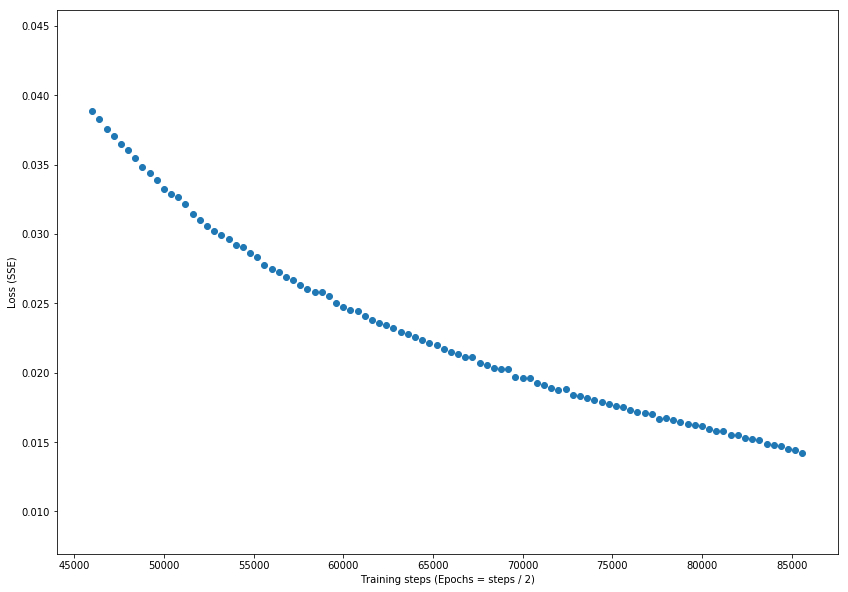

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

In [71]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.4f degrees Celcius" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.4f degrees Celcius" % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-85600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.85
The Mean Absolute Error: 0.0065 degrees Celcius
The Median Absolute Error: 0.0040 degrees Celcius


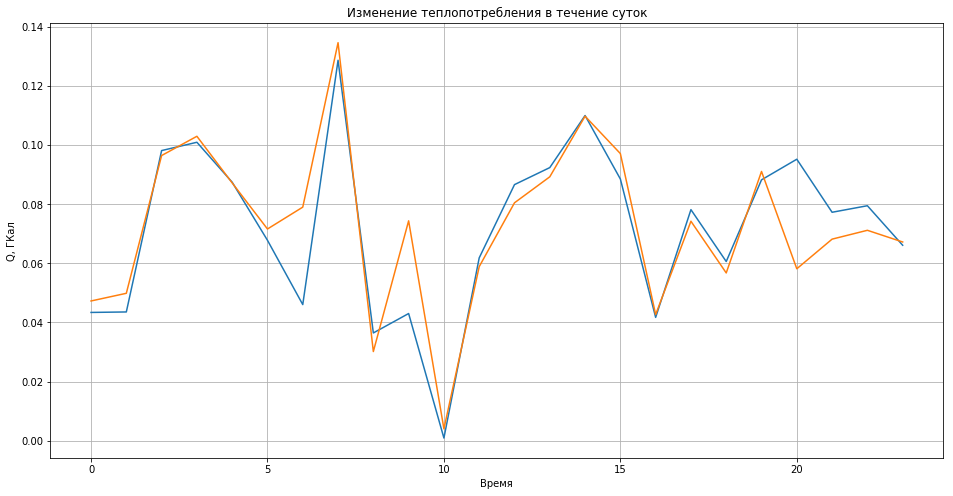

In [105]:
# Qnorm = dataset['Q']*((18-dataset['T_Inside'])/(18+24))
# Qnorm1 = Qnorm.head(24)
y1 = predictions[0:24]
x = list(range(0,24))
# Q1 =dataset['Q'].head(24)
# y1 = Q1.tolist()

# Q2 = y.tolist()
y2 = y_test[0:24]

# Q3 = y_test.tolist()
# y3 = Q3[0:24]
fig, ax = plt.subplots()

ax.plot(x, y1, x, y2)
ax.grid()

# f_nom = 22.5 # Номинальная температура, которую следует поддерживать
# xmin = table.values [0,0] # Начало оси x
# xmax = '23:59:59' # Конец оси x
# ax.hlines(f_nom, xmin, xmax, colors = 'r')


# ymin = table.values [0,1] # Начало оси y
# ymax = 28 # Конец оси x


ax.set_xlabel('Время')
ax.set_ylabel('Q, ГКал')
ax.set_title('Изменение теплопотребления в течение суток')

fig.set_figwidth(16)
fig.set_figheight(8)

plt.show()

In [103]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df

,Actual,Predicted
3167,0.047274,0.043396
2890,0.049868,0.043559
1391,0.096468,0.098146
159,0.102977,0.100955
1566,0.087198,0.087436
2524,0.071620,0.067793
2600,0.079018,0.046050
1525,0.134638,0.128694
3812,0.030166,0.036459
2541,0.074387,0.043027
